## 로켓 발사 예측 - 3가지 모델 비교

### 데이터 불러오기 및 살펴보기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [164]:
# TODO: 데이터 불러와서 확인하기
rocket = pd.read_csv('./data/RocketLaunchDataCSV.csv')
rocket.sample(5)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
247,Apollo 14,09-Feb-71,22:03,Kennedy,Crewed,Y,71.0,0.0,58.26,70.0,...,13.0,15.0,5.0,NaN,NaN,30.15,NaN,11:04,Fair,NaN
167,New Horizons,19-Jan-06,20:00,Cape Canaveral,Uncrewed,Y,69.0,42.0,59.25,65.0,...,15.0,10.0,9.0,NaN,NaN,30.34,NaN,10:37,Partly Cloudy,NaN
220,NaN,09-Oct-68,NaN,Cape Canaveral,NaN,NaN,81.0,0.0,72.46,NaN,...,18.0,15.0,NaN,NaN,NaN,30.03,NaN,11:39,Cloudy,NaN
141,NaN,26-Sep-07,NaN,Cape Canaveral,NaN,NaN,84.0,74.0,78.67,NaN,...,18.0,10.0,NaN,NaN,NaN,29.98,NaN,12:02,Cloudy,NaN
287,Gemini 9A,03-Jun-66,14:39,Cape Canaveral,Crewed,Y,87.0,0.0,74.40,83.0,...,15.0,15.0,6.0,NaN,NaN,29.96,NaN,13:49,Cloudy,NaN


In [165]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

In [166]:
rocket[rocket['Notes'].notna()]['Notes']

29     Looks like we didn’t capture temp at 7pm - pro...
291                                     T-Storm at night
297                                   Rain before launch
Name: Notes, dtype: object

In [167]:
rocket.isnull().sum().sort_values(ascending=False)

Hist Ave Sea Level Pressure     300
Hist Ave Visibility             300
Hist Ave Max Wind Speed         300
Notes                           297
Temp at Launch Time             241
Wind Speed at Launch Time       241
Time (East Coast)               241
Launched?                       240
Crewed or Uncrewed              240
Name                            240
Condition                         2
Day Length                        2
Visibility                        1
Ave Temp                          1
Low Temp                          1
Max Wind Speed                    1
High Temp                         1
Hist High Temp                    1
Percipitation at Launch Time      1
Hist Ave Temp                     1
Wind Direction                    1
Hist Ave Percipitation            1
Hist Low Temp                     1
Sea Level Pressure                1
Location                          0
Date                              0
dtype: int64

### 데이터 전처리

In [168]:
# TODO: 결측치 처리및 문자열데이터 인코딩

전체가 누락된 컬럼 : 'Hist Ave Max Wind Speed','Hist Ave Visibility','Hist Ave Sea Level Pressure'
날씨와 무관한 컬럼 : 'Name','Date',Time (East Coast)','Location','Day Length','Notes', 'Sea Level Pressure'
종속변수 : 'Launched?'

#### 누락/무관 컬럼 제거

In [169]:
cols_all_na = ['Hist Ave Sea Level Pressure', 'Hist Ave Visibility', 'Hist Ave Max Wind Speed']
cols_irrelevant = ['Name','Date', 'Time (East Coast)','Location', 'Day Length','Notes', 'Sea Level Pressure']

rocket = rocket.drop( columns= cols_all_na + cols_irrelevant, axis=1)
rocket.head(1)


,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,NaN,NaN,75.0,68.0,71.0,NaN,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,NaN,Cloudy


In [170]:
rocket.info() # 16개 컬럼 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            60 non-null     object 
 1   Launched?                     60 non-null     object 
 2   High Temp                     299 non-null    float64
 3   Low Temp                      299 non-null    float64
 4   Ave Temp                      299 non-null    float64
 5   Temp at Launch Time           59 non-null     float64
 6   Hist High Temp                299 non-null    float64
 7   Hist Low Temp                 299 non-null    float64
 8   Hist Ave Temp                 299 non-null    float64
 9   Percipitation at Launch Time  299 non-null    float64
 10  Hist Ave Percipitation        299 non-null    float64
 11  Wind Direction                299 non-null    object 
 12  Max Wind Speed                299 non-null    float64
 13  Visib

#### 종속변수의 null 처리 : NaN -> 'N'

In [171]:
# Launched? = N
rocket['Launched?'].value_counts()

Launched?
Y    59
N     1
Name: count, dtype: int64

In [172]:
rocket['Launched?'] = rocket['Launched?'].fillna('N')
rocket['Launched?'].value_counts()


Launched?
N    241
Y     59
Name: count, dtype: int64

#### 적당한 값으로 결측치 처리

In [173]:
# crewed 결측치 = Uncrewed로
rocket['Crewed or Uncrewed'].value_counts()

Crewed or Uncrewed
Uncrewed    44
Crewed      16
Name: count, dtype: int64

In [174]:
# Crewed
rocket['Crewed or Uncrewed'] = rocket['Crewed or Uncrewed'].fillna('Uncrewed')
rocket['Crewed or Uncrewed'].value_counts()

Crewed or Uncrewed
Uncrewed    284
Crewed       16
Name: count, dtype: int64

In [175]:
# Wind Direction = Unknown
rocket['Wind Direction'].value_counts()

Wind Direction
E     80
W     54
NE    42
SE    38
S     28
NW    25
N     19
SW    13
Name: count, dtype: int64

In [176]:
# 결측치 1개고, 대체하기 애매하므로 Unknown으로 대체
rocket['Wind Direction'] = rocket['Wind Direction'].fillna('Unknown')
rocket['Wind Direction'].value_counts()

Wind Direction
E          80
W          54
NE         42
SE         38
S          28
NW         25
N          19
SW         13
Unknown     1
Name: count, dtype: int64

In [177]:
# Condition = Cloudy
rocket['Condition'].isna().sum()

np.int64(2)

In [178]:
# 최빈값으로 대체
rocket['Condition'] = rocket['Condition'].fillna('Cloudy')
rocket['Condition'].value_counts().sum()

np.int64(300)

In [183]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    object 
 1   Launched?                     300 non-null    object 
 2   High Temp                     299 non-null    float64
 3   Low Temp                      299 non-null    float64
 4   Ave Temp                      299 non-null    float64
 5   Temp at Launch Time           59 non-null     float64
 6   Hist High Temp                299 non-null    float64
 7   Hist Low Temp                 299 non-null    float64
 8   Hist Ave Temp                 299 non-null    float64
 9   Percipitation at Launch Time  299 non-null    float64
 10  Hist Ave Percipitation        299 non-null    float64
 11  Wind Direction                300 non-null    object 
 12  Max Wind Speed                299 non-null    float64
 13  Visib

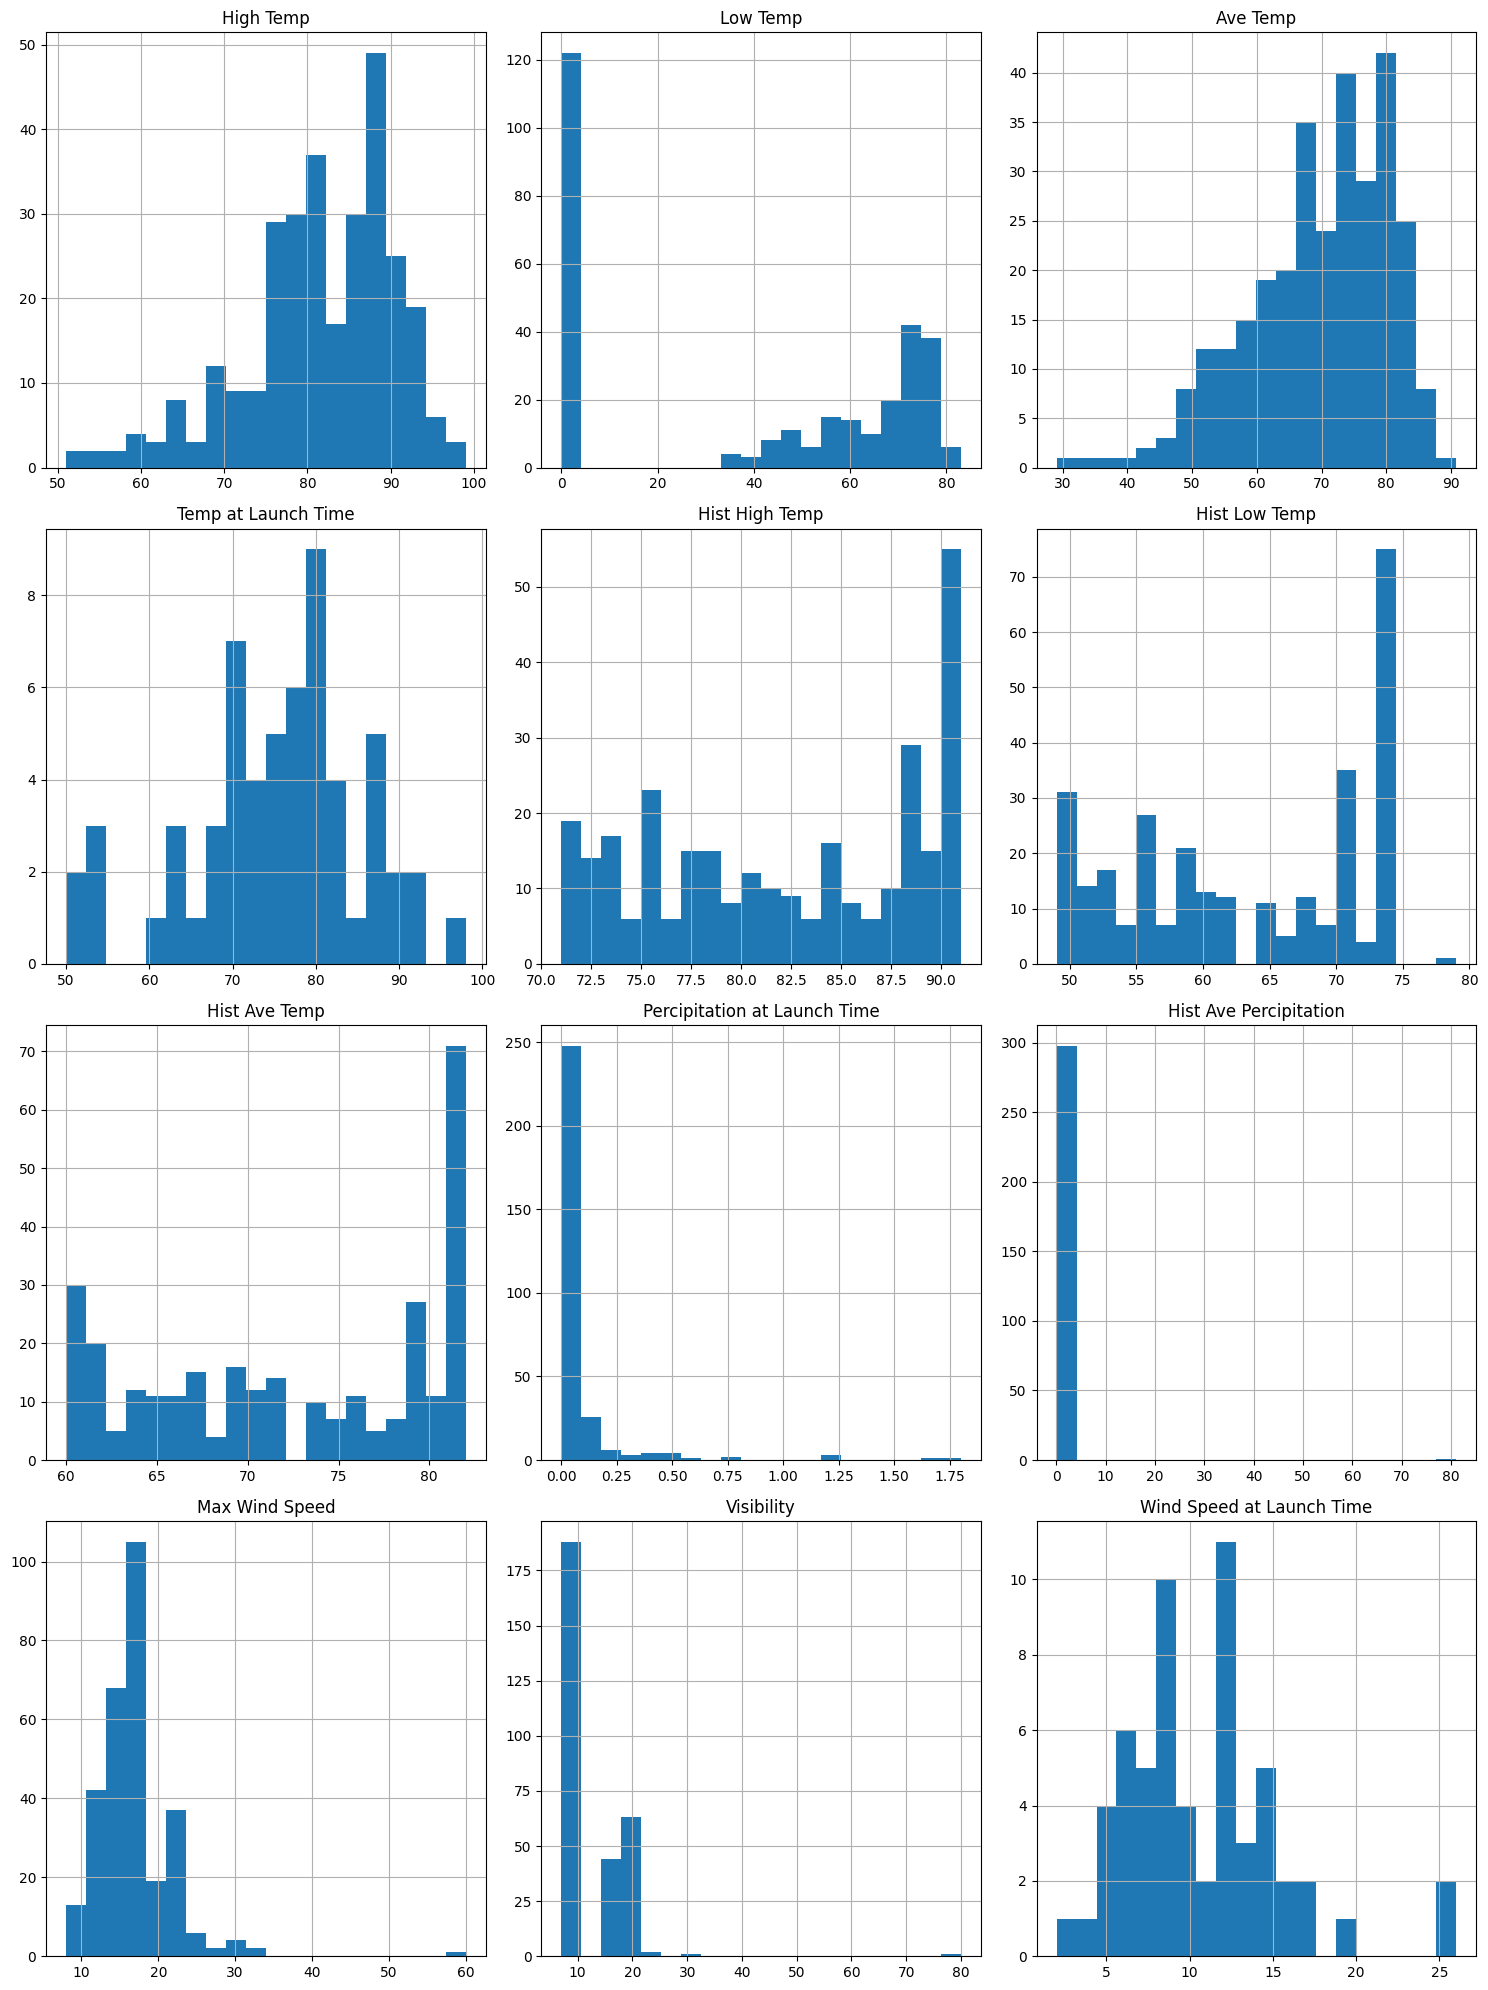

In [180]:
# 기타는 중앙값 또는 최빈값
# 수치형 컬럼 : 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp' ,'Hist Ave Temp','Percipitation at Launch Time','Hist Ave Percipitation','Max Wind Speed','Visibility','Wind Speed at Launch Time'
cols_numerical = ['High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp' ,'Hist Ave Temp','Percipitation at Launch Time','Hist Ave Percipitation','Max Wind Speed','Visibility','Wind Speed at Launch Time']
# 일단 각 컬럼의 분포 확인해보기 
rocket[cols_numerical].hist(figsize=(15, 20), bins=20)
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Temp at Launch Time'}>,
        <Axes: title={'center': 'Wind Speed at Launch Time'}>]],
      dtype=object)

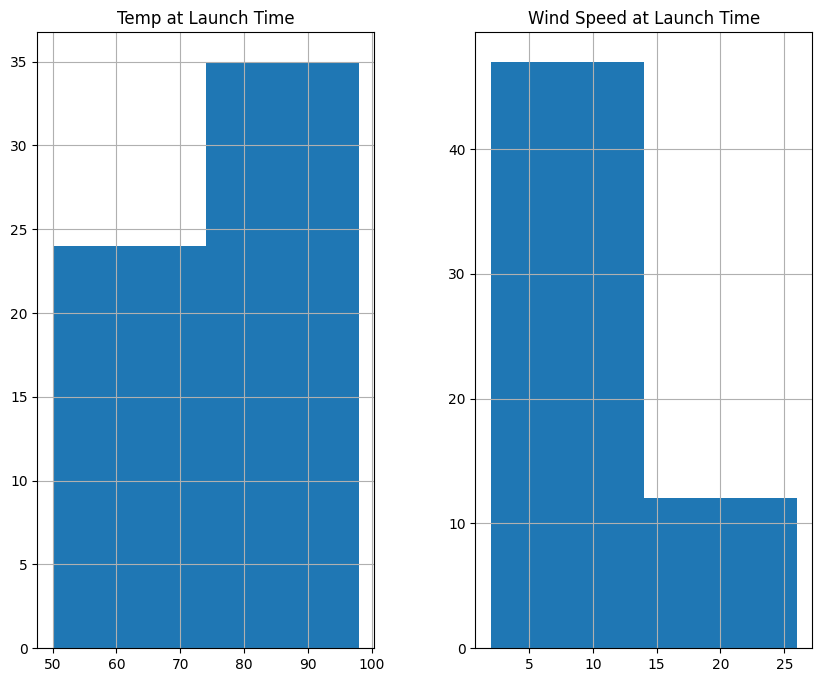

In [ ]:
# 결측값 처리 전, 결측치 개수가 Launched와 같았던 데이터 분포 다시 확인해보기
rocket[['Temp at Launch Time','Wind Speed at Launch Time']].hist(figsize=(10,8), bins=2)

In [ ]:
cols_fill_mean = ['High Temp', 'Ave Temp', 'Temp at Launch Time','Max Wind Speed','Visibility','Wind Speed at Launch Time']
cols_fill_mode = ['Low Temp', 'Hist High Temp', 'Hist Low Temp' ,'Hist Ave Temp','Percipitation at Launch Time','Hist Ave Percipitation']

# 평균으로 대체
for col in cols_fill_mean:
    rocket[col] = rocket[col].fillna(rocket[col].mean())

# 최빈값으로 대체
for col in cols_fill_mode:
    rocket[col] = rocket[col].fillna(rocket[col].mode()[0])

In [59]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    object 
 1   Launched?                     300 non-null    object 
 2   High Temp                     300 non-null    float64
 3   Low Temp                      300 non-null    float64
 4   Ave Temp                      300 non-null    float64
 5   Temp at Launch Time           300 non-null    float64
 6   Hist High Temp                300 non-null    float64
 7   Hist Low Temp                 300 non-null    float64
 8   Hist Ave Temp                 300 non-null    float64
 9   Percipitation at Launch Time  300 non-null    float64
 10  Hist Ave Percipitation        300 non-null    float64
 11  Wind Direction                300 non-null    object 
 12  Max Wind Speed                300 non-null    float64
 13  Visib

In [61]:
# 문자데이터 라벨인코딩 : 문자->숫자
# 범주형 데이터 열 : 'Crewed or Uncrewed', 'Wind Direction', 'Condition'
from sklearn.preprocessing import LabelEncoder

cols_str = ['Crewed or Uncrewed', 'Wind Direction', 'Condition']
le = LabelEncoder()
for col in cols_str:
    rocket[col] = le.fit_transform(rocket[col])
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    int64  
 1   Launched?                     300 non-null    object 
 2   High Temp                     300 non-null    float64
 3   Low Temp                      300 non-null    float64
 4   Ave Temp                      300 non-null    float64
 5   Temp at Launch Time           300 non-null    float64
 6   Hist High Temp                300 non-null    float64
 7   Hist Low Temp                 300 non-null    float64
 8   Hist Ave Temp                 300 non-null    float64
 9   Percipitation at Launch Time  300 non-null    float64
 10  Hist Ave Percipitation        300 non-null    float64
 11  Wind Direction                300 non-null    int64  
 12  Max Wind Speed                300 non-null    float64
 13  Visib

In [62]:
# 종속변수, 타겟값도 0,1로 인코딩
rocket['Launched?'] = rocket['Launched?'].map({'Y': 1, 'N' :0})
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    int64  
 1   Launched?                     300 non-null    int64  
 2   High Temp                     300 non-null    float64
 3   Low Temp                      300 non-null    float64
 4   Ave Temp                      300 non-null    float64
 5   Temp at Launch Time           300 non-null    float64
 6   Hist High Temp                300 non-null    float64
 7   Hist Low Temp                 300 non-null    float64
 8   Hist Ave Temp                 300 non-null    float64
 9   Percipitation at Launch Time  300 non-null    float64
 10  Hist Ave Percipitation        300 non-null    float64
 11  Wind Direction                300 non-null    int64  
 12  Max Wind Speed                300 non-null    float64
 13  Visib

### EDA

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

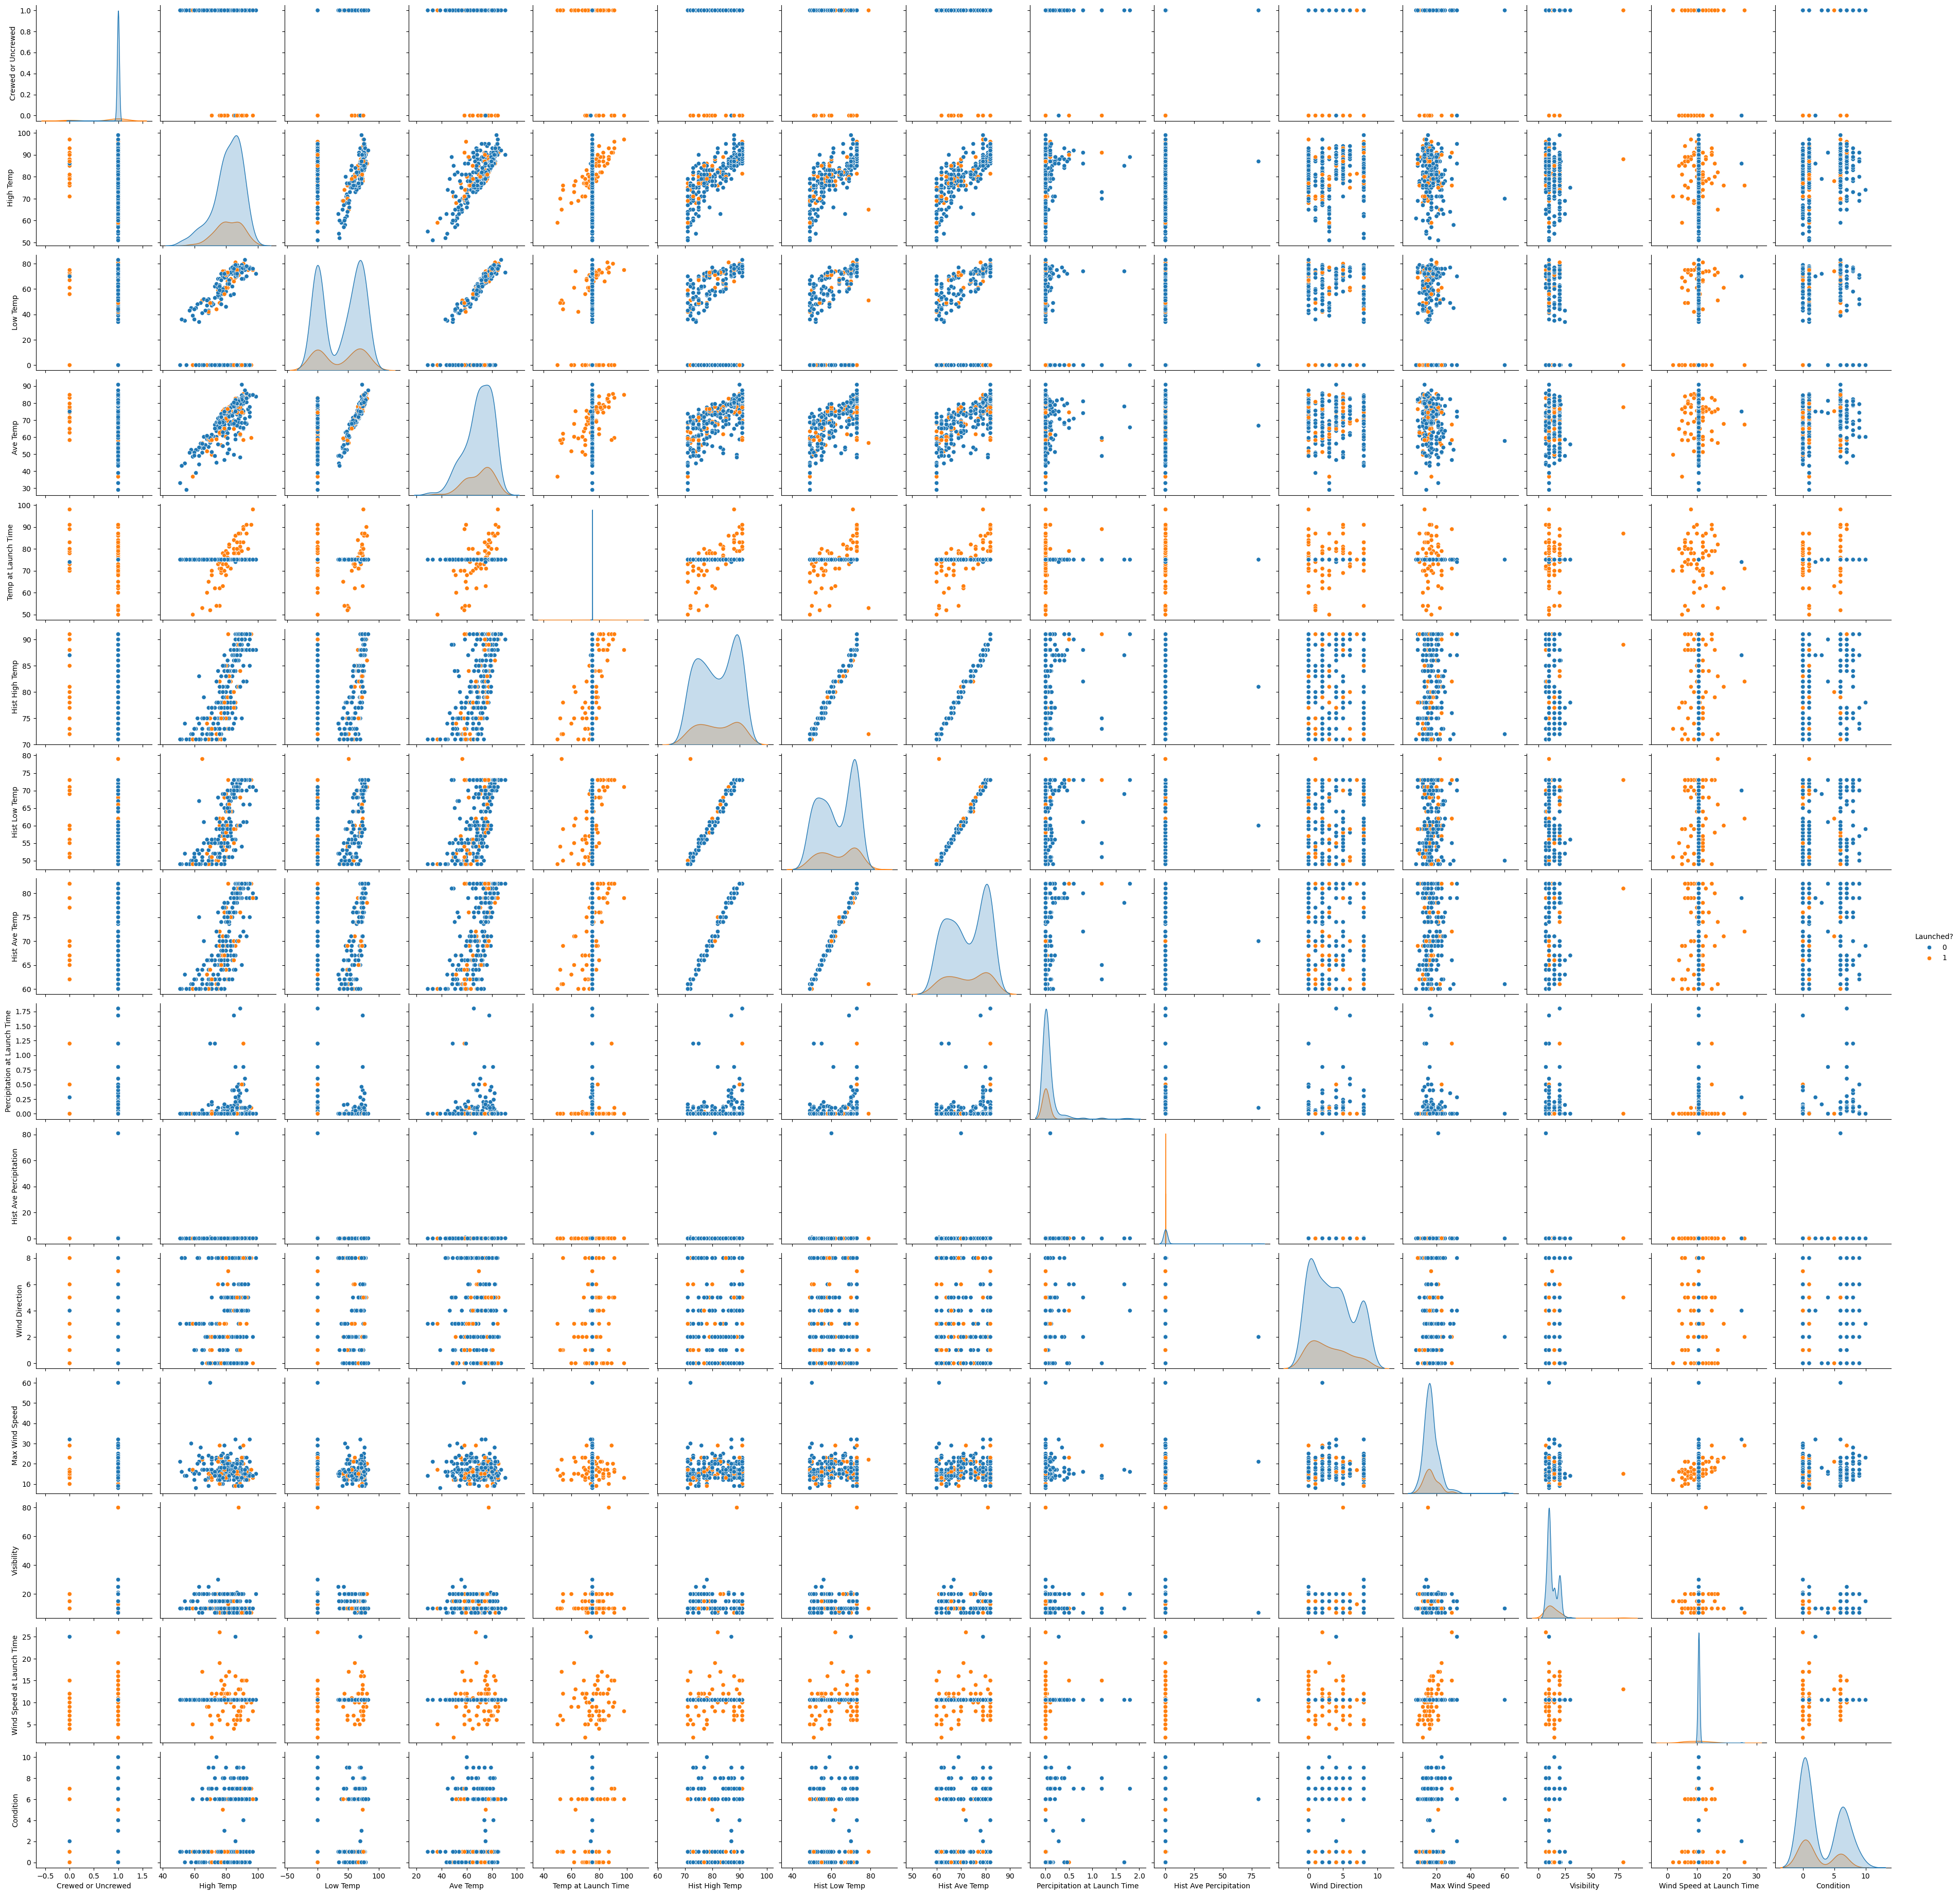

In [67]:
sns.pairplot(rocket, hue='Launched?')

<Axes: >

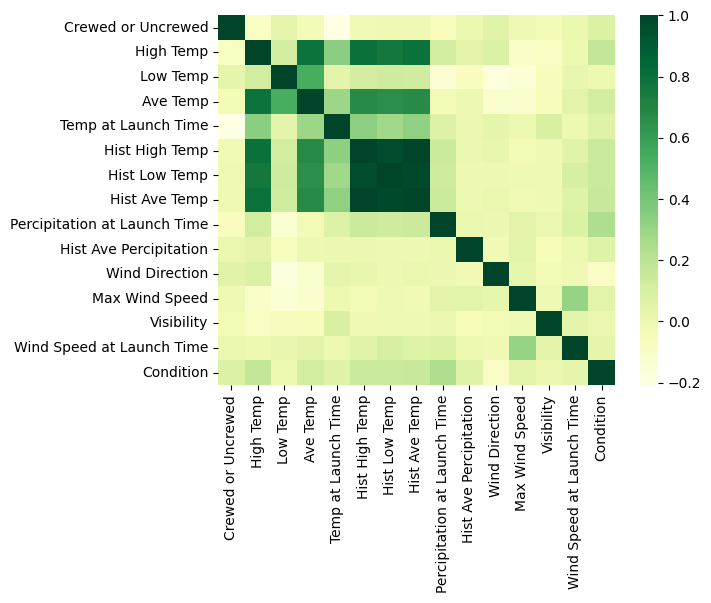

In [69]:
sns.heatmap(X.corr(), cmap='YlGn')

### 데이터 준비 및 모델 학습

In [63]:
# TODO: 데이터 분리하기
X = rocket.drop(columns='Launched?', axis=1)
y = rocket['Launched?']

In [102]:
# 학습/테스트 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(210, 15) (90, 15) (210,) (90,)


In [103]:
y_train.value_counts()

Launched?
0    169
1     41
Name: count, dtype: int64

In [126]:
# TODO: 모델 만들고 성능 평가하기

# 모델 라이브러리
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# 성능 라이브러리
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### 의사결정트리

In [135]:
#객체 생성
dt_clf = DecisionTreeClassifier(random_state=42)

#학습
dt_clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [136]:
# 예측
pred_dt = dt_clf.predict(X_test)

# 예측 결과
print('의사결정나무 분류기')
print('1. 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred_dt)))

print('2. 훈련/테스트 정확도')
print("  - 훈련 정확도:", dt_clf.score(X_train, y_train))
print("  - 테스트 정확도:", dt_clf.score(X_test, y_test))

print("3. 분류 리포트")
print(classification_report(y_test, pred_dt))

의사결정나무 분류기
1. 예측 정확도: 1.0000
2. 훈련/테스트 정확도
  - 훈련 정확도: 1.0
  - 테스트 정확도: 1.0
3. 분류 리포트
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        18

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



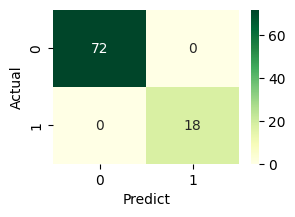

In [137]:
# confusion 매트릭스 시각화
cm_dt = confusion_matrix(y_test, pred_dt, labels= [0, 1])
plt.figure(figsize=(3,2))
sns.heatmap(cm_dt, annot=True, cmap='YlGn')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

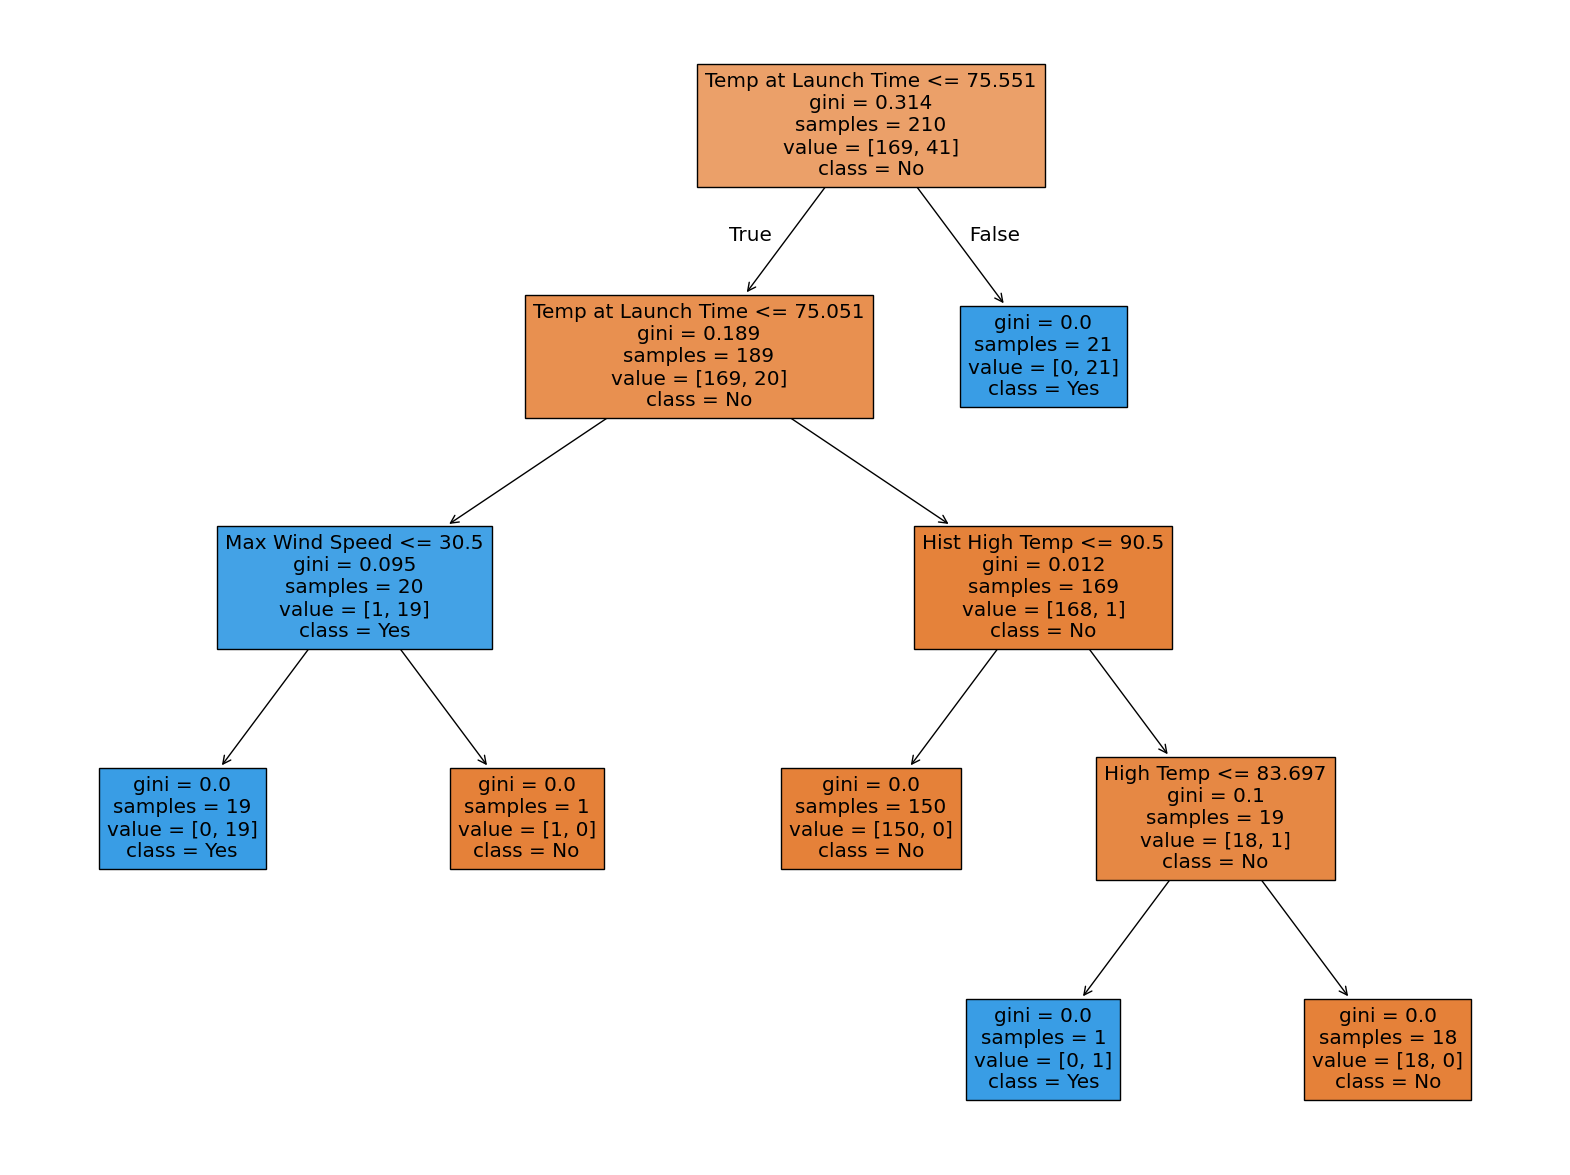

In [138]:
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree( dt_clf, 
          feature_names=X_train.columns, class_names= ['No', 'Yes'],
          filled=True)
plt.show()

<Axes: ylabel='None'>

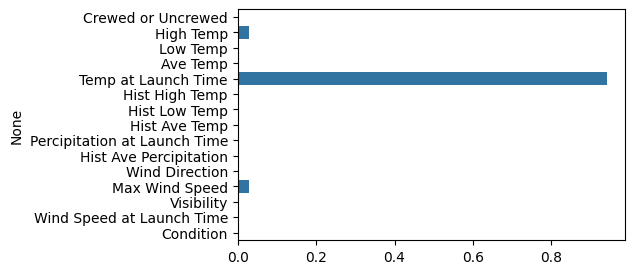

In [139]:
# feature importance 보기
plt.figure(figsize=(5,3))
sns.barplot(y= X_train.columns, x=dt_clf.feature_importances_)

하나의 featured에 대한 의존도가 너무 높은 것 같다.
특히 발사 시점과 연관된 컬럼 
['Crewed or Uncrewed', 'Temp at Launch Time', 'Wind Speed at Lanch Time'] 
은 결측치가 Launced 데이터보다 하나 많았다.
해당 컬럼을 제거하고 다시 시도해보자
=> 
의사결정나무 분류기
1. 예측 정확도: 0.6778
2. 훈련/테스트 정확도
  - 훈련 정확도: 1.0
  - 테스트 정확도: 0.6777777777777778
3. 분류 리포트                  
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        72
           1       0.21      0.22      0.22        18

    accuracy                           0.68        90
   macro avg       0.51      0.51      0.51        90
weighted avg       0.68      0.68      0.68        90
=> 과적합이 너무 심하다. 

In [155]:
# Launched? 와 비슷하게 결측치가 많았던 컬럼 제외
X = rocket.drop(columns=['Launched?', 'Crewed or Uncrewed', 'Temp at Launch Time', 'Wind Speed at Launch Time'], axis=1)
y = rocket['Launched?']
X_train2, X_test2, y_train2, y_test2 = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)
dt_clf2 = DecisionTreeClassifier(random_state=42, max_depth=4)

#학습
dt_clf2.fit(X_train2, y_train2)
# 예측
pred_dt2 = dt_clf2.predict(X_test2)

# 예측 결과
print('의사결정나무 분류기 - 컬럼 제거')
print('1. 예측 정확도: {0:.4f}'.format(accuracy_score(y_test2, pred_dt2)))

print('2. 훈련/테스트 정확도')
print("  - 훈련 정확도:", dt_clf2.score(X_train2, y_train2))
print("  - 테스트 정확도:", dt_clf2.score(X_test2, y_test2))

print("3. 분류 리포트")
print(classification_report(y_test2, pred_dt2))

의사결정나무 분류기 - 컬럼 제거
1. 예측 정확도: 0.7667
2. 훈련/테스트 정확도
  - 훈련 정확도: 0.8238095238095238
  - 테스트 정확도: 0.7666666666666667
3. 분류 리포트
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        72
           1       0.00      0.00      0.00        18

    accuracy                           0.77        90
   macro avg       0.40      0.48      0.43        90
weighted avg       0.63      0.77      0.69        90



In [156]:
y_train2.value_counts()

Launched?
0    169
1     41
Name: count, dtype: int64

<Axes: ylabel='None'>

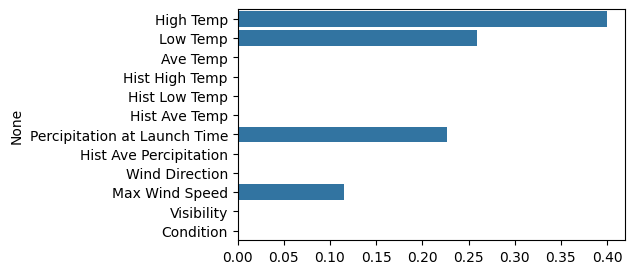

In [157]:
# feature importance 보기
plt.figure(figsize=(5,3))
sns.barplot(y= X_train2.columns, x=dt_clf2.feature_importances_)

#### KNN-분류

In [128]:
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train, y_train)

# 예측
pred_knn_class = knn_class.predict(X_test)

# 예측 결과
print('KNN_분류')
print('1. 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred_dt)))

print('2. 훈련/테스트 정확도')
print("  - 훈련 정확도:", knn_class.score(X_train, y_train))
print("  - 테스트 정확도:", knn_class.score(X_test, y_test))

print("3. 분류 리포트")
print(classification_report(y_test, pred_knn_class))

KNN_분류
1. 예측 정확도: 0.6667
2. 훈련/테스트 정확도
  - 훈련 정확도: 0.8571428571428571
  - 테스트 정확도: 0.8222222222222222
3. 분류 리포트
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        72
           1       1.00      0.11      0.20        18

    accuracy                           0.82        90
   macro avg       0.91      0.56      0.55        90
weighted avg       0.85      0.82      0.76        90



#### 랜덤포레스트분류기

In [131]:
rf_class = RandomForestClassifier()
rf_class.fit(X_train, y_train)

# 예측
pred_rf_class = rf_class.predict(X_test)

# 예측 결과
print('랜덤포레스트-분류')
print('1. 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred_rf_class)))

print('2. 훈련/테스트 정확도')
print("  - 훈련 정확도:", rf_class.score(X_train, y_train))
print("  - 테스트 정확도:", rf_class.score(X_test, y_test))

print("3. 분류 리포트")
print(classification_report(y_test, pred_rf_class))

랜덤포레스트-분류
1. 예측 정확도: 1.0000
2. 훈련/테스트 정확도
  - 훈련 정확도: 1.0
  - 테스트 정확도: 1.0
3. 분류 리포트
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        18

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



#### 로지스틱회귀

In [132]:
logi_reg = LogisticRegression()
logi_reg.fit(X_train, y_train)

# 예측
pred_logi_reg = logi_reg.predict(X_test)

# 예측 결과
print('로지스틱회귀')
print('1. 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred_logi_reg)))

print('2. 훈련/테스트 정확도')
print("  - 훈련 정확도:", logi_reg.score(X_train, y_train))
print("  - 테스트 정확도:", logi_reg.score(X_test, y_test))

print("3. 분류 리포트")
print(classification_report(y_test, pred_logi_reg))

로지스틱회귀
1. 예측 정확도: 0.8111
2. 훈련/테스트 정확도
  - 훈련 정확도: 0.8666666666666667
  - 테스트 정확도: 0.8111111111111111
3. 분류 리포트
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        72
           1       1.00      0.06      0.11        18

    accuracy                           0.81        90
   macro avg       0.90      0.53      0.50        90
weighted avg       0.85      0.81      0.74        90



### GridSearch로 하이퍼파라미터 튜닝

In [134]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# 교차 검증 객체 생성
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

#### Decision Tree GridSearch

In [152]:
dt_clf = DecisionTreeClassifier(random_state=42)

# 하이퍼 파라미터 지정
param_dt = {
    'max_depth': [3, 5, 7, 10, None], # 의사결정나무 깊이
    'min_samples_split': [2, 5, 10, 20], # 분할할 수 있는 최소 샘플 개수
    'min_samples_leaf': [1, 2, 5, 10],     #리프 노드가 가질 수 있는 최소 샘플 개수
    'criterion': ['gini', 'entropy']    # 불순도 지표
}

# 그리드 서치 객체 생성
gscv_dt = GridSearchCV(dt_clf, param_grid=param_dt, cv=skf, refit=True)

# 그리드 서치로 학습 
gscv_dt.fit(X_train2, y_train2)

# 최적의 파라미터
print(gscv_dt.best_params_)

# 최적의 파라미터로 학습 
dt_best = gscv_dt.best_estimator_
pred_dt_best = dt_best.predict(X_test2)


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


#### KNN-classifier GridSearch

In [ ]:
knn_class = KNeighborsClassifier()

# 하이퍼 파라미터 지정
param_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15], # n_neighbors: 이웃의 수 (너무 작으면 과적합, 크면 과소적합)
    'weights': ['uniform', 'distance'], # weights: 거리 기반 가중치 부여 여부 ('uniform' 동일하게, 'distance' 가까울수록 높게) 
    'metric': ['euclidean', 'manhattan', 'minkowski'] # metric: 거리 측정 방식 ('minkowski'는 p값에 따라 유클리드/맨해튼으로 변함)
}

# 그리드 서치 객체 생성
gscv_knn = GridSearchCV(knn_class, param_grid=param_knn, cv=skf, refit=True)

# 그리드 서치로 학습 
gscv_knn.fit(X_train, y_train)

# 최적의 파라미터
print(gscv_knn.best_params_)

# 최적의 파라미터로 학습 
knn_best = gscv_knn.best_estimator_
pred_knn_best = knn_best.predict(X_test)

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


#### RandomForest GridSearch

In [150]:
# 모델 생성 
rf_class = RandomForestClassifier(random_state=42)

# 하이퍼 파라미터 지정
param_rf = {
    'n_estimators': [100, 200, 300], # n_estimators: 결정 트리의 개수 (보통 100단위로 조절)
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'] # max_features: 각 노드에서 분할에 사용할 특징의 개수 ('sqrt', 'log2' 등)
}

# 그리드 서치 객체 생성
gscv_rf = GridSearchCV(rf_class, param_grid=param_rf, cv=skf, refit=True)

# 그리드 서치로 학습 
gscv_rf.fit(X_train, y_train)

# 최적의 파라미터
print(gscv_rf.best_params_)

# 최적의 파라미터로 학습 
rf_best = gscv_rf.best_estimator_
pred_rf_best = rf_best.predict(X_test)

{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


### 성능 평가 및 비교

In [153]:
out = f'''
compare DT ,RF, LR
DT : {gscv_dt.best_score_}
KNN : {gscv_knn.best_score_}
RF : {gscv_rf.score(X_test, y_test)}
LR : {logi_reg.score(X_test, y_test)}

DT confusion matrix : 
{classification_report(y_test, pred_dt_best)}

KNN Confusion matrix : 
{classification_report(y_test, pred_knn_best)}

RF confusion matrix : 
{classification_report(y_test, pred_rf_best)}

LR confusion matrix : 
{classification_report(y_test, pred_logi_reg)}
'''
print(out)


compare DT ,RF, LR
DT : 0.8047619047619048
KNN : 0.8285714285714285
RF : 1.0
LR : 0.8111111111111111

DT confusion matrix : 
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        72
           1       0.00      0.00      0.00        18

    accuracy                           0.77        90
   macro avg       0.40      0.48      0.43        90
weighted avg       0.63      0.77      0.69        90


KNN Confusion matrix : 
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        72
           1       1.00      0.11      0.20        18

    accuracy                           0.82        90
   macro avg       0.91      0.56      0.55        90
weighted avg       0.85      0.82      0.76        90


RF confusion matrix : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        18

    acc